# Clustering with Genetic algorithm and K-mreans

## GA

### Adding library

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import numpy as np 
from numpy.random import randint,choice,random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

### Loading Iris data

In [2]:
data=load_iris()
X=data['data']
y=data['target']

### function of GA

fitness function is silhoute index in sklearn library

In [3]:
def fitness(X,labels):
    # return calinski_harabasz_score(X,labels)
    return silhouette_score(X,labels,metric='euclidean')

mutation

In [4]:
def mutation(gen,mut_arr):
    mut=choice(mut_arr,size=1,p=[0.95,0.05])[0]
    mut(gen)

def mut1(x):
    k=x[-1]
    i=randint(0,x.shape[0])
    if k>0:
        a=randint(0,k)
        x[i]=a
def mut0(gen):
    pass

mut_arr=[mut0,mut1]

cross-over

In [5]:
def cross(a, b):
    global X
    k1 = a[-1]
    k2 = b[-1]
    a_ = a[:-1]
    b_ = b[:-1]
    cross_points=randint(1, len(a_) - 1,size=2)
    (cross_point1,cross_point2) = (np.min(cross_points),np.max(cross_points))
    new_a = np.concatenate([a_[:cross_point1],b_[cross_point1:cross_point2], a_[cross_point2:], [max(k1, k2)]])
    new_b = np.concatenate([b_[:cross_point1],a_[cross_point1:cross_point2], b_[cross_point2:], [max(k1, k2)]])
    l_score=np.array([fitness(X,label) for label in [a[:-1],b[:-1],new_a[:-1],new_b[:-1]]])
    p=[f/sum(l_score) for f in l_score]
    l=[a,b,new_a,new_b]
    (ind1,ind2)=choice(range(len(l)),size=2,p=p)
    return l[ind1],l[ind2]



selection

In [6]:
def select(gen, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [f / total_fitness for f in fitness_scores]
    selected_indices = np.random.choice(range(len(gen)), size=2, p=probabilities, replace=False)
    return gen[selected_indices[0]], gen[selected_indices[1]]

Initialize first population

In [7]:
def initialize_population(n_individuals, n_data_points, max_clusters):
    population = np.random.randint(1, max_clusters + 1, size=(n_individuals, n_data_points + 1))
    population[:, -1] = np.random.randint(1, max_clusters + 1, size=n_individuals)
    return population


## Running GA

In [8]:
n_generations = 100  
population_size = 50
n_data_points = X.shape[0] 
max_clusters = 10  

population = initialize_population(population_size, n_data_points, max_clusters)
fitness_tot=[]
for generation in range(n_generations):
    fitness_scores = np.array([fitness(X, individual[:-1]) for individual in population])
    fitness_tot.append(np.max(fitness_scores))
    new_population = []
    while len(new_population) < population_size:
        parent_a, parent_b = select(population, fitness_scores)
        offspring_a, offspring_b = cross(parent_a, parent_b)
        new_population.extend([offspring_a, offspring_b])
    
    for individual in new_population:
        mutation(individual,mut_arr=mut_arr)
    population = np.array(new_population)[:population_size]


max score of GA

In [9]:
max(fitness_tot)

-0.13366887167544655

## evaluation

fitness over time

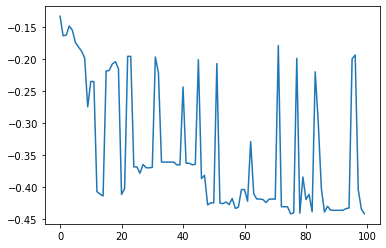

In [10]:
plt.plot(fitness_tot)
plt.savefig('./report/img/gen-per.jpg')
plt.show()

scatter plot base on two selectd feature

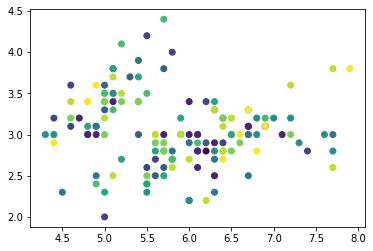

In [11]:
fitness_scores = np.array([fitness(X, individual[:-1]) for individual in population])
best_choice=population[np.argmax(fitness_scores),:]

plt.scatter(X[:,0],X[:,1],c=best_choice[:-1])
plt.savefig('./report/img/scatter-ga.jpg')

## Kmeans

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


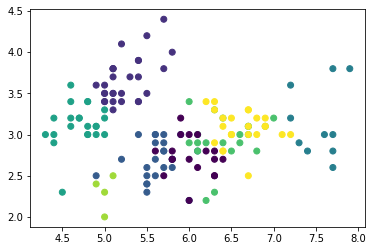

In [12]:
y_kmeans=KMeans().fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_kmeans)
plt.savefig('./report/img/scatter-kmeans.jpg')

In [13]:
fitness(X,y_kmeans)

0.35745369258527165

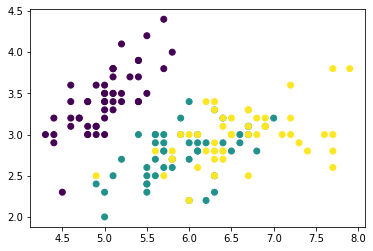

In [14]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.savefig('./report/img/scatter-real.jpg')